epoch = 1/60
train_loss = 18.5
epoch = 2/60
train_loss = 14.342883999999998
epoch = 3/60
train_loss = 11.146947396159998
epoch = 4/60
train_loss = 8.689909644421865
epoch = 5/60
train_loss = 6.800894449885612
epoch = 6/60
train_loss = 5.348542100859659
epoch = 7/60
train_loss = 4.231870925873803
epoch = 8/60
train_loss = 3.373252115794891
epoch = 9/60
train_loss = 2.7130091775498557
epoch = 10/60
train_loss = 2.205266309701292
epoch = 11/60
train_loss = 1.8147568761689887
epoch = 12/60
train_loss = 1.5143699473075847
epoch = 13/60
train_loss = 1.283264224042437
epoch = 14/60
train_loss = 1.105418132948492
epoch = 15/60
train_loss = 0.9685152240647263
epoch = 16/60
train_loss = 0.8630873298599672
epoch = 17/60
train_loss = 0.7818558759109604
epoch = 18/60
train_loss = 0.7192255190388162
epoch = 19/60
train_loss = 0.6708948858949773
epoch = 20/60
train_loss = 0.6335573315306179
epoch = 21/60
train_loss = 0.6046709000694437
epoch = 22/60
train_loss = 0.5822814839141119
epoch = 23/60
train

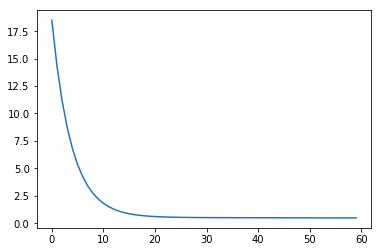

[1, 0, 1, 0]
[0.969, -0.038, 0.955, -0.007]
[0.941732, -0.071328, 0.915612, -0.013059999999999999]
[0.917736208, -0.10055968, 0.881144432, -0.018295887999999996]
[0.896609487936, -0.126199784192, 0.8509909436800001, -0.022809272127999998]
[0.877998378483968, -0.148690861734912, 0.824619898046208, -0.026689240218879997]
[0.8615929720931461, -0.1684209304832205, 0.801565166940413, -0.03001390257636659]
[0.8471215482504517, -0.18573019638401217, 0.781418058981524, -0.03285174463446383]
[0.8343458680389304, -0.2009169449037793, 0.7638202421535111, -0.035262812942709686]
[0.8230570485050057, -0.21424270650824243, 0.7484575384785095, -0.03729975501324814]
[0.813071945389956, -0.22593678564704137, 0.7350544833159613, -0.039008731036997334]
[0.8042299815845159, -0.23620023167280443, 0.7233695550698752, -0.04043021325732035]
[0.7963903663841929, -0.24520932045995078, 0.7131909926959055, -0.041599686844143766]
[0.7894296573904779, -0.2531186070152504, 0.7043331285790213, -0.04254826440572837]
[0

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

train_X = [[1, 2, 3], [5, 6, 7]]
train_Y = [3, 6]

#weight init
weight = [1, 0, 1, 0]
weight_record = []
weight_record.append([i for i in weight])

#define learning rate
lr = 0.001

#define mu for momentum
mu = 0.8

#define epoch
epoch = 60

#input data preprocessing
#add bias
for x in train_X:
    x.append(1)

#input layer
def myInputLayer(unit_no, train_data):
    unit = []
    for i in range(unit_no):
        unit.append(train_data[i])

    return unit

#output layer
def myOutputLayer(input_data):
    z = 0
    for i in range(len(input_data)):
        z += input_data[i] * weight[i]
        
    #activation
    y = myIdentity(z)

    return y

#activation function - identity function
def myIdentity(z):
    y = z

    return y

#loss function - MSE
def myMSE(est, t):
    E = 0
    for i in range(len(est)):
        E += ((est[i] - t[i]) ** 2) / 2

    return E

#calculate ΔE
def myCalcDE(train_X, train_Y, est_Y):
    #create X^T
    i = len(train_X)
    j = len(train_X[0])
    XT = [[0 for i in range(i)] for j in range(j)]
    for k in range(j):
        for l in range(i):
            XT[k][l] = train_X[l][k]

    #calc ΔE
    DE = []
    for x in range(len(XT)):
        tmp = 0
        for y in range(len(XT[0])):
            tmp += ((est_Y[y] - train_Y[y]) * XT[x][y])
        DE.append(tmp)

    return DE

#weight update
def myWeightUpdate(weight, DE, lr):
    for i in range(len(weight)):
        weight[i] -= lr * DE[i]
    w = [i for i in weight]
    
    return w

#weight update using momentum
def myWeightUpdate_Momentum(weight, weight_record, DE, lr, mu):
    for i in range(len(weight)):
        if len(weight_record) >= 2:
            Dw = weight_record[-1][i] - weight_record[-2][i]
            weight[i] -= (lr * DE[i]) + (mu * Dw)
        else:
            weight[i] -= lr * DE[i]
    w = [i for i in weight]
    
    return w

#main
t_loss = []

for ep in range(epoch):
    est_Y = []
    
    for i in train_X:
        out1 = myInputLayer(3, i)
        est_Y.append(myOutputLayer(out1))

    E = myMSE(est_Y, train_Y)
    t_loss.append(E)

    DE = myCalcDE(train_X, train_Y, est_Y)
    
    w = myWeightUpdate(weight, DE, lr)
    #w = myWeightUpdate_Momentum(weight, weight_record, DE, lr, mu)
    weight_record.append(w)
    
    print("epoch = " + str(ep + 1) + "/" + str(epoch))
    print("train_loss = " + str(E))
    
plt.plot(range(epoch), t_loss)
plt.show()

for i in weight_record:
    print(i)